In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
X = df.drop(columns = ['Id','Species'])
y = df['Species']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [14]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [15]:
predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

cm = classification_report(y_test, predictions)
print(cm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



## tuning

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'C':[0.1,1,10],
    'gamma':[0.01,0.1,1],
    'kernel':['rbf','linear']   
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train_scaled,y_train)


print("Best params: ", grid.best_params_)
pred_1 = grid.predict(X_test_scaled)
print(classification_report(y_test, pred_1))

Best params:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [22]:
best_model = SVC(C=1, gamma=0.01, kernel='linear')
best_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, kernel='linear')

In [23]:
pred_3 = best_model.predict(X_test_scaled)
print(classification_report(y_test, pred_3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



# DT

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [34, 35, 36]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 35, 36]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

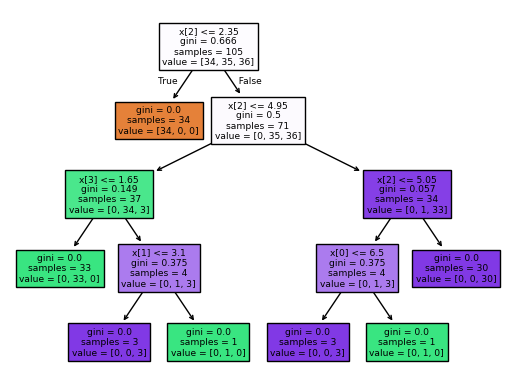

In [25]:
from sklearn.tree import plot_tree
plot_tree(dt_model, filled=True)

In [26]:
predictions = dt_model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### pre-prune

In [29]:
model2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [34, 35, 36]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 35, 36]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

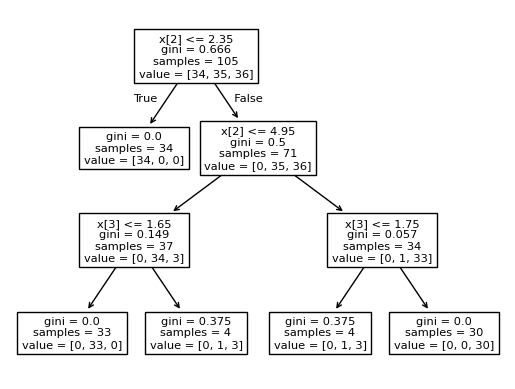

In [30]:
from sklearn.tree import plot_tree
plot_tree(model2)

In [32]:
predictions = model2.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# KNN

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [37]:
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [39]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Try k from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [40]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score: 0.9714285714285715


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Final evaluation
print("Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Tuned KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.82      1.00      0.90        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.95      0.93      0.93        45

Confusion Matrix:
[[16  0  0]
 [ 0 12  3]
 [ 0  0 14]]


# Log regg

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],       # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear'],        # Solver that supports l1 penalty
    'max_iter': [100, 200, 300]    # Maximum iterations for convergence
}

# Grid search with cross-validation
grid = GridSearchCV(log_reg, param_grid, cv=5, verbose=1)
grid.fit(X_train_scaled, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

